In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 14.4 MB/s eta 0:00:00


In [ ]:
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch import arch_model
import requests
import numpy as np
import os

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
api_key = os.getenv("ALPHAVANTAGE_API_KEY")

In [ ]:
ticker = "AAPL"
output_size ="full"
interval= "60min"
api_key =api_key
adjusted =True

In [ ]:
url = ("https://www.alphavantage.co/query?"
"function=TIME_SERIES_INTRADAY&"
f"symbol={ticker}&"
f"interval={interval}&"
f"adjusted={adjusted}&"
f"outputsize={output_size}&"
f"apikey={api_key}")

print(url)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=60min&adjusted=True&outputsize=full&apikey=None


In [ ]:
response = requests.get(url=url)

In [ ]:
response.status_code

200

In [ ]:
response_data = response.json()

In [ ]:
response_data.keys()

dict_keys(['Meta Data', 'Time Series (60min)'])

In [ ]:
stock_data = response_data["Time Series (60min)"]

In [ ]:
df = pd.DataFrame.from_dict(stock_data, orient="index", dtype=float)
df.head()

,1. open,2. high,3. low,4. close,5. volume
2025-08-25 19:00:00,227.300,227.3300,227.0200,227.0700,11560.0
2025-08-25 18:00:00,227.140,227.4600,227.1000,227.2500,10995.0
2025-08-25 17:00:00,227.260,231.8672,211.6634,227.1012,25906.0
2025-08-25 16:00:00,227.180,230.3080,216.1894,227.2600,8919160.0
2025-08-25 15:00:00,227.545,227.8358,227.1200,227.1500,4583431.0


In [ ]:
df.columns = [c.split(". ")[1] for c in df.columns]

In [ ]:
df.head()

,open,high,low,close,volume
2025-08-25 19:00:00,227.300,227.3300,227.0200,227.0700,11560.0
2025-08-25 18:00:00,227.140,227.4600,227.1000,227.2500,10995.0
2025-08-25 17:00:00,227.260,231.8672,211.6634,227.1012,25906.0
2025-08-25 16:00:00,227.180,230.3080,216.1894,227.2600,8919160.0
2025-08-25 15:00:00,227.545,227.8358,227.1200,227.1500,4583431.0


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.index.name= "date"

In [ ]:
df.head()

,open,high,low,close,volume
date,,,,,
2025-08-25 19:00:00,227.300,227.3300,227.0200,227.0700,11560.0
2025-08-25 18:00:00,227.140,227.4600,227.1000,227.2500,10995.0
2025-08-25 17:00:00,227.260,231.8672,211.6634,227.1012,25906.0
2025-08-25 16:00:00,227.180,230.3080,216.1894,227.2600,8919160.0
2025-08-25 15:00:00,227.545,227.8358,227.1200,227.1500,4583431.0


Text(0.5, 0, 'Date')

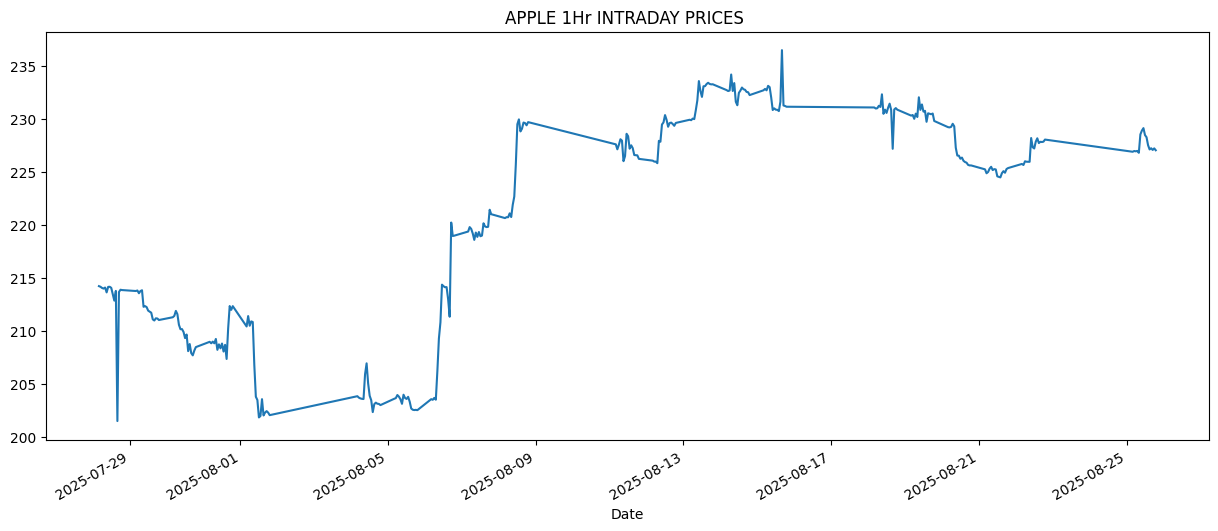

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

df["close"].plot(ax=ax)
plt.title("APPLE 1Hr INTRADAY PRICES ")
plt.xlabel("Date")

In [ ]:
DB = "my_database.db"

In [ ]:
connection = sqlite3.connect(database=DB, check_same_thread=False)

In [ ]:
def insert_table(table_name, records,connection,if_exists):

  n_inserted= records.to_sql(name=table_name,con=connection,if_exists=if_exists)

  return {"transaction_successful":True,
          "records_inserted": n_inserted}



In [ ]:
def read_table(table_name,connection,limit=None):

  if limit:
    sql= f"SELECT * FROM '{table_name}' LIMIT '{limit}'"
  else:
    sql= f"SELECT * FROM '{table_name}'"

  df = pd.read_sql(sql=sql, con =connection, parse_dates=["date"], index_col="date" )

  return df


In [ ]:
response=insert_table(table_name=ticker,records=df,connection=connection, if_exists="replace")

In [ ]:
df_apple = read_table(table_name=ticker,connection=connection, limit=None)

In [ ]:
df_apple.head()

,open,high,low,close,volume
date,,,,,
2025-08-25 19:00:00,227.300,227.3300,227.0200,227.0700,11560.0
2025-08-25 18:00:00,227.140,227.4600,227.1000,227.2500,10995.0
2025-08-25 17:00:00,227.260,231.8672,211.6634,227.1012,25906.0
2025-08-25 16:00:00,227.180,230.3080,216.1894,227.2600,8919160.0
2025-08-25 15:00:00,227.545,227.8358,227.1200,227.1500,4583431.0


In [ ]:
df_apple.tail()

,open,high,low,close,volume
date,,,,,
2025-07-28 08:00:00,214.0750,214.6943,210.9386,214.1138,156101.0
2025-07-28 07:00:00,214.0550,214.2548,213.8852,214.0151,53889.0
2025-07-28 06:00:00,214.2148,214.4546,214.0051,214.0750,29261.0
2025-07-28 05:00:00,214.2348,214.3347,214.0850,214.1849,17183.0
2025-07-28 04:00:00,214.2848,214.6044,214.0550,214.2448,48097.0


In [ ]:
df_apple["return"] = df_apple["close"].pct_change() * 100

In [ ]:
df_apple.head()

,open,high,low,close,volume,return
date,,,,,,
2025-08-25 19:00:00,227.300,227.3300,227.0200,227.0700,11560.0,NaN
2025-08-25 18:00:00,227.140,227.4600,227.1000,227.2500,10995.0,0.079271
2025-08-25 17:00:00,227.260,231.8672,211.6634,227.1012,25906.0,-0.065479
2025-08-25 16:00:00,227.180,230.3080,216.1894,227.2600,8919160.0,0.069925
2025-08-25 15:00:00,227.545,227.8358,227.1200,227.1500,4583431.0,-0.048403


In [ ]:
y= df_apple["return"].dropna()

In [ ]:
y.head()

,return
date,
2025-08-25 18:00:00,0.079271
2025-08-25 17:00:00,-0.065479
2025-08-25 16:00:00,0.069925
2025-08-25 15:00:00,-0.048403
2025-08-25 14:00:00,0.176095


In [ ]:
cutoff = int(len(y)*0.8)
cutoff

268

In [ ]:
y_train= y.iloc[:cutoff]
len(y_train)

268

In [ ]:
y_test = y.iloc[cutoff:]
len(y_test)

67

Text(0.5, 0, 'Date')

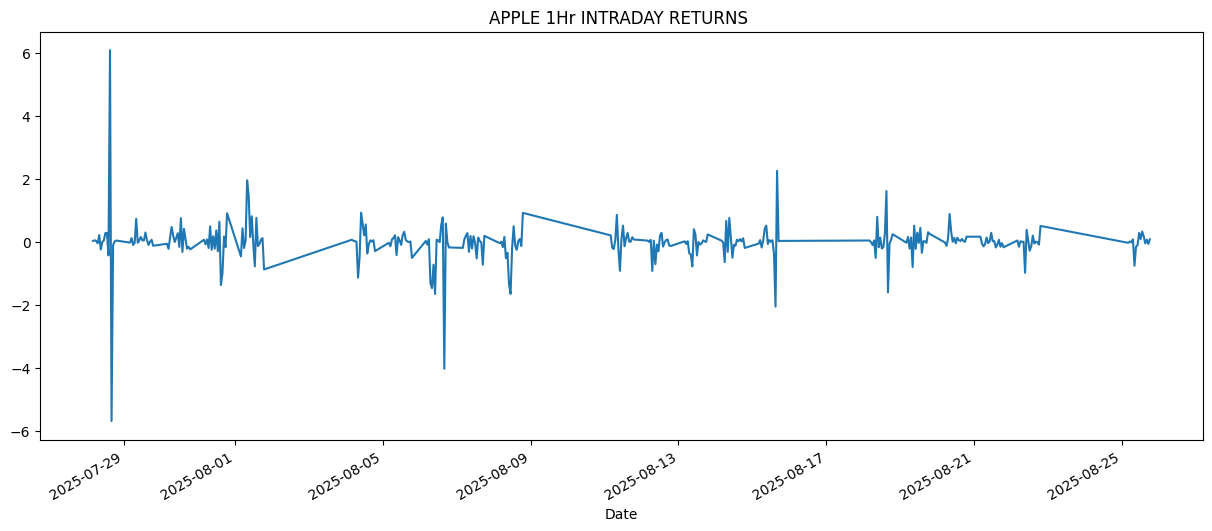

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

y.plot(ax=ax)
plt.title("APPLE 1Hr INTRADAY RETURNS ")
plt.xlabel("Date")

In [ ]:
y_std = y.std()
print(f"apple hourly standard deviation is {y_std}")

apple hourly standard deviation is 0.6726158597218518


In [ ]:
y_std_daily = (y.std()) * np.sqrt(6.5)
print(f"apple daily standard deviation is {y_std_daily}")

apple daily standard deviation is 1.7148406969368546


Text(0.5, 0, 'Lags')

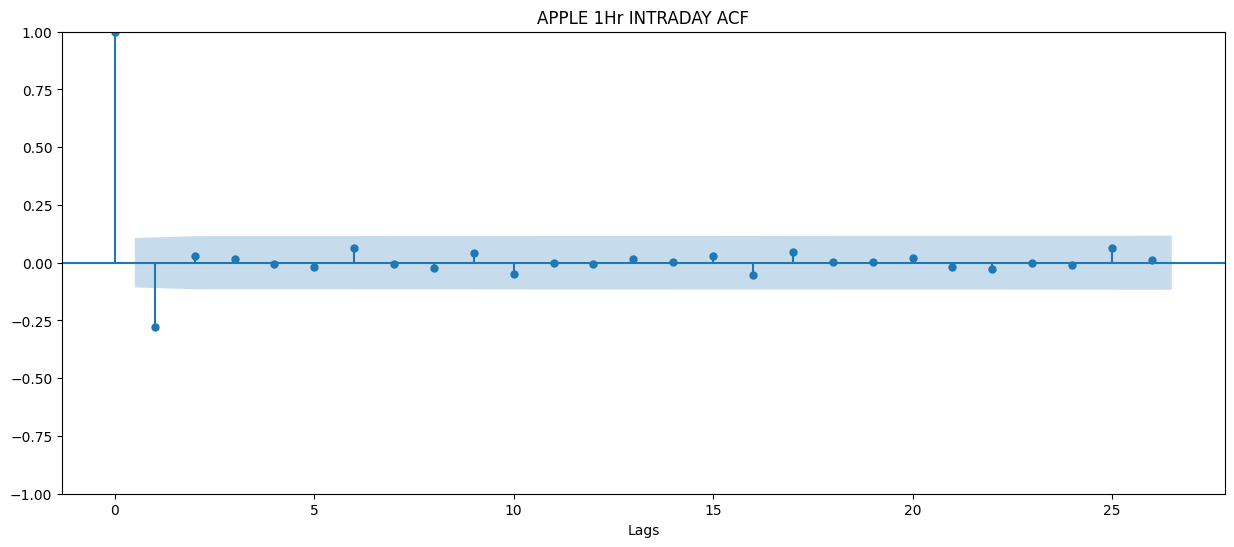

In [ ]:
fig, ax= plt.subplots(figsize=(15,6))

plot_acf(y, ax=ax)
plt.title("APPLE 1Hr INTRADAY ACF")
plt.xlabel("Lags")

Text(0.5, 0, 'Lags')

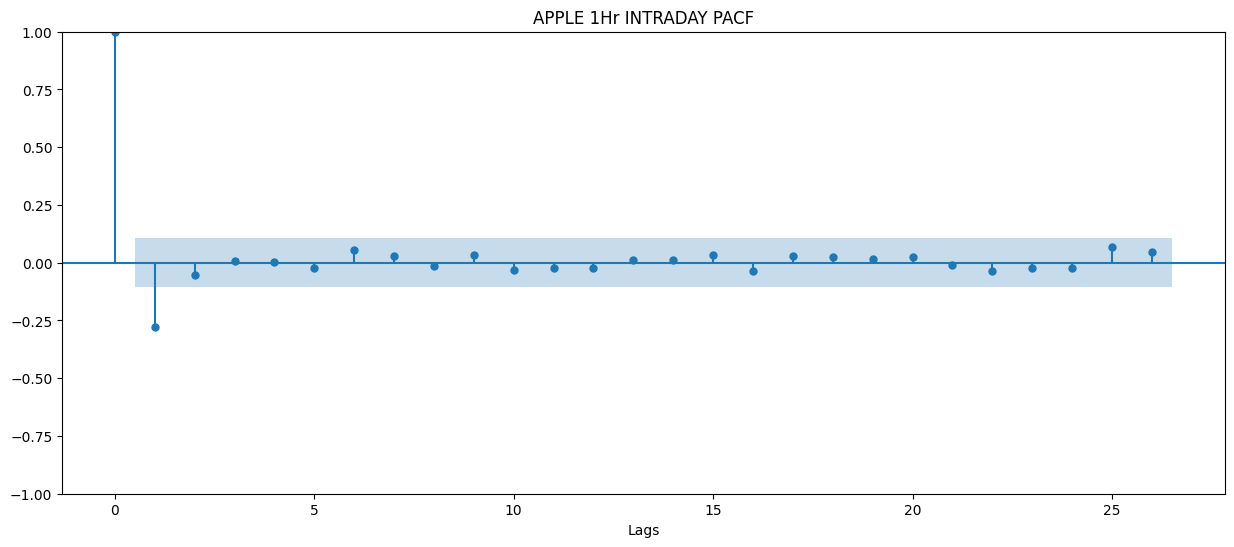

In [ ]:
fig, ax= plt.subplots(figsize=(15,6))

plot_pacf(y, ax=ax)
plt.title("APPLE 1Hr INTRADAY PACF")
plt.xlabel("Lags")

In [ ]:
model = arch_model(y_train, p=1,q=0,rescale=False).fit(disp=0)

print(model)
model.summary()

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -177.730
Distribution:                  Normal   AIC:                           361.461
Method:            Maximum Likelihood   BIC:                           372.234
                                        No. Observations:                  268
Date:                Tue, Aug 26 2025   Df Residuals:                      267
Time:                        14:01:03   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0278  2.716e-02     -1.022      0.307 

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -177.730
Distribution:                  Normal   AIC:                           361.461
Method:            Maximum Likelihood   BIC:                           372.234
                                        No. Observations:                  268
Date:                Tue, Aug 26 2025   Df Residuals:                      267
Time:                        14:01:03   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0278  2.716e-02     -1.022      0.307 [-8.099e-02,2.547e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1464  4.486e-02      3.263  1.101e-03 [5.847e-02,  0.234]
alpha[1]       0.7833      0.676      1.158      0.247   [ -0.542,  2.109]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_t = arch_model(y_train, mean='Constant', vol='ARCH', p=1,q=1, dist='t').fit(disp=0)
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - ARCH Model Results                         
====================================================================================
Dep. Variable:                       return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -86.2647
Distribution:      Standardized Student's t   AIC:                           180.529
Method:                  Maximum Likelihood   BIC:                           194.893
                                              No. Observations:                  268
Date:                      Tue, Aug 26 2025   Df Residuals:                      267
Time:                              14:01:13   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.4248e-03  1.071e-02      0.693      0.488 [-1.357e-02,2.842e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2254      0.115      1.960  4.997e-02 [2.922e-05,  0.451]
alpha[1]       1.0000      0.376      2.657  7.879e-03   [  0.262,  1.738]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             2.2166  9.055e-02     24.479 2.469e-132 [  2.039,  2.394]
========================================================================

Covariance estimator: robust
"""

In [ ]:
y_rolling_std_20 = y.rolling(window=20).std().dropna()
y_rolling_std_20

,return
date,
2025-08-22 15:00:00,0.243871
2025-08-22 14:00:00,0.246922
2025-08-22 13:00:00,0.248788
2025-08-22 12:00:00,0.257250
2025-08-22 11:00:00,0.257225
...,...
2025-07-28 08:00:00,1.927396
2025-07-28 07:00:00,1.927441
2025-07-28 06:00:00,1.927450


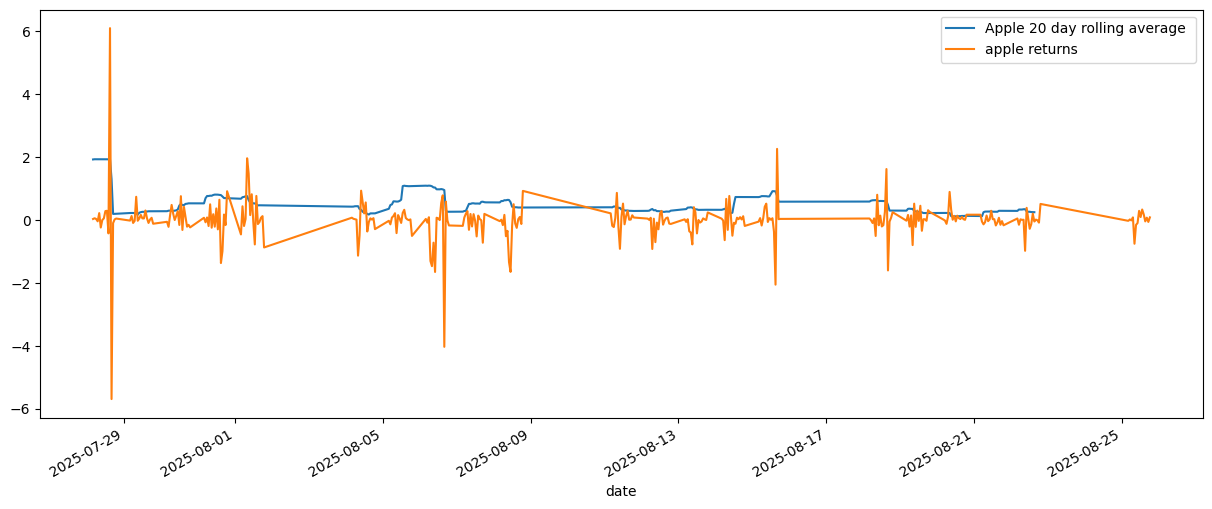

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
y_rolling_std_20.plot(ax=ax, label="Apple 20 day rolling average ")
y.plot(ax=ax, label="apple returns")
plt.legend()

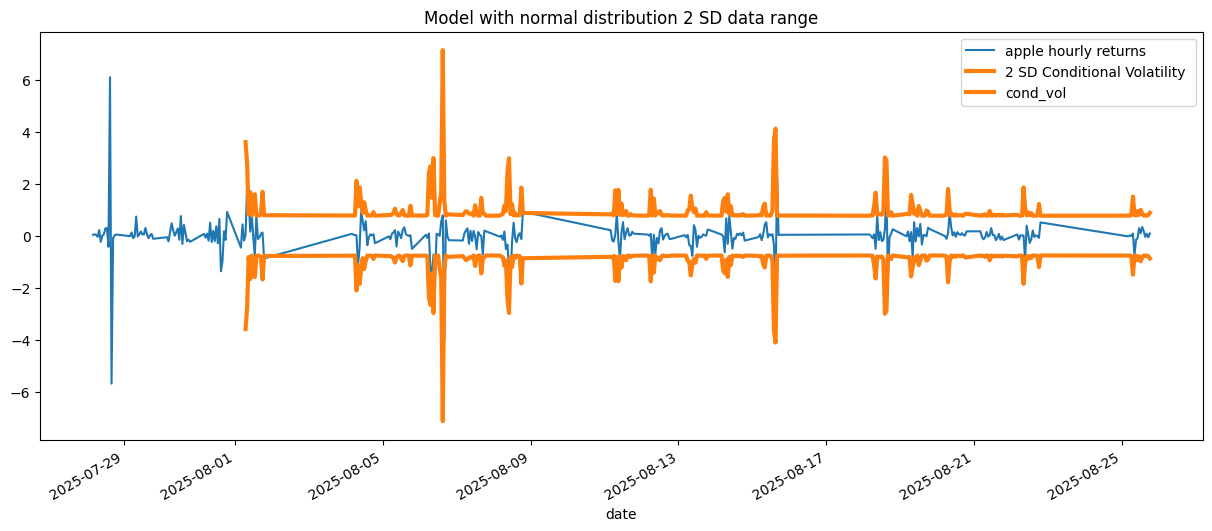

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

y.plot(ax=ax, label="apple hourly returns")
(2 * model.conditional_volatility).plot(ax=ax, color="C1",label="2 SD Conditional Volatility ", linewidth=3)
(-2 * model.conditional_volatility).plot(ax=ax, color="C1", linewidth= 3)
plt.title("Model with normal distribution 2 SD data range")
plt.legend()

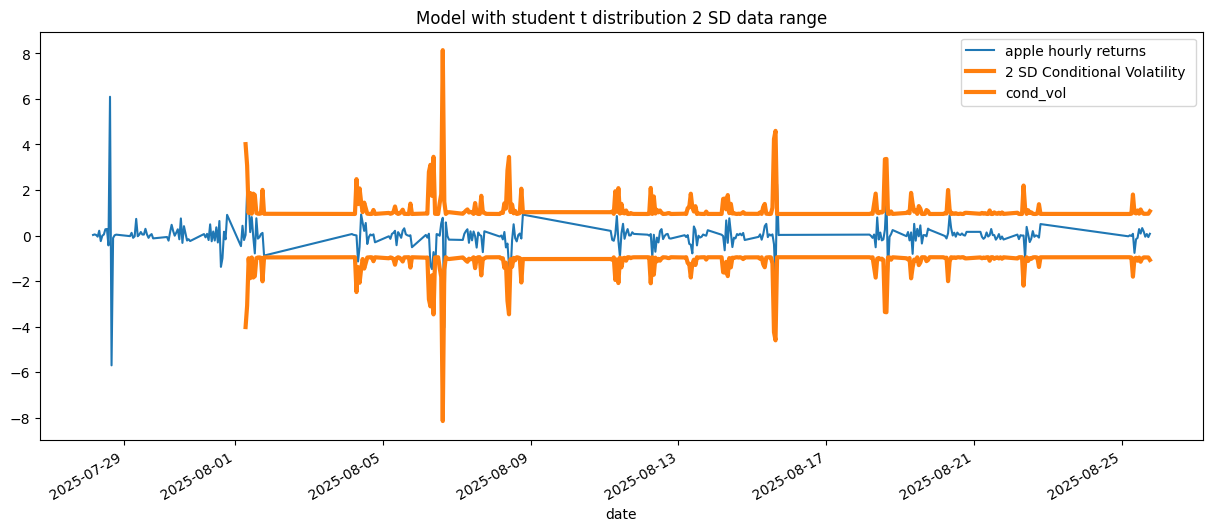

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

y.plot(ax=ax, label="apple hourly returns")
(2 * model_t.conditional_volatility).plot(ax=ax, color="C1",label="2 SD Conditional Volatility ", linewidth=3)
(-2 * model_t.conditional_volatility).plot(ax=ax, color="C1", linewidth= 3)
plt.title("Model with student t distribution 2 SD data range")
plt.legend()

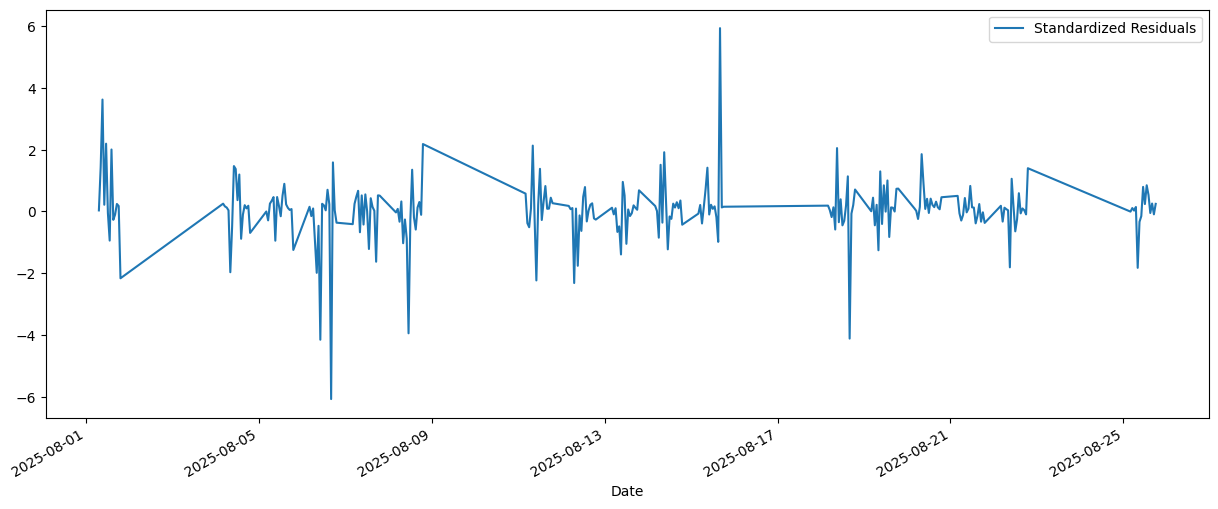

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot standardized residuals
model.std_resid.plot(ax=ax, label="Standardized Residuals")

# Add axis labels
plt.xlabel("Date")
plt.title("")

# Add legend
plt.legend();

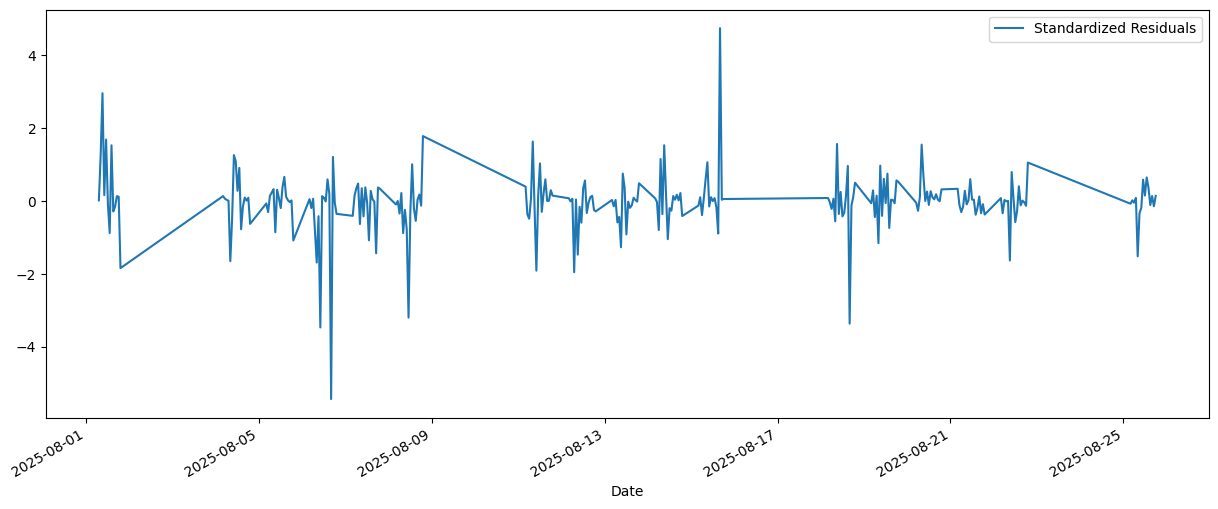

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot standardized residuals
model_t.std_resid.plot(ax=ax, label="Standardized Residuals")

# Add axis labels
plt.xlabel("Date")

# Add legend
plt.legend();

Text(0.5, 1.0, 'Distribution of Standardized Residuals Normal Distribution')

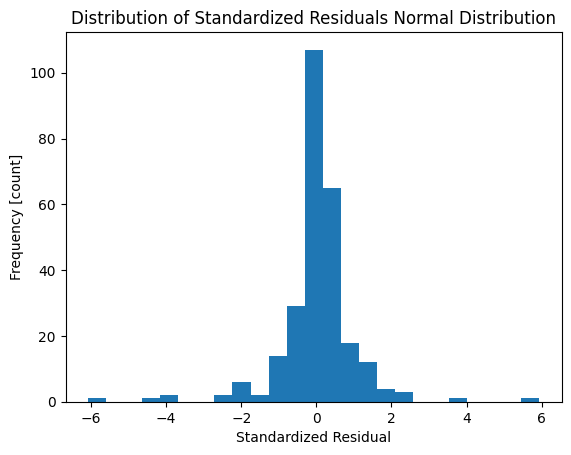

In [ ]:


plt.hist(model.std_resid, bins=25)

# Add axis labels
plt.xlabel("Standardized Residual")
plt.ylabel("Frequency [count]")



# Add title
plt.title("Distribution of Standardized Residuals Normal Distribution")

Text(0.5, 1.0, 'Distribution of Standardized Residuals Student t Distribution')

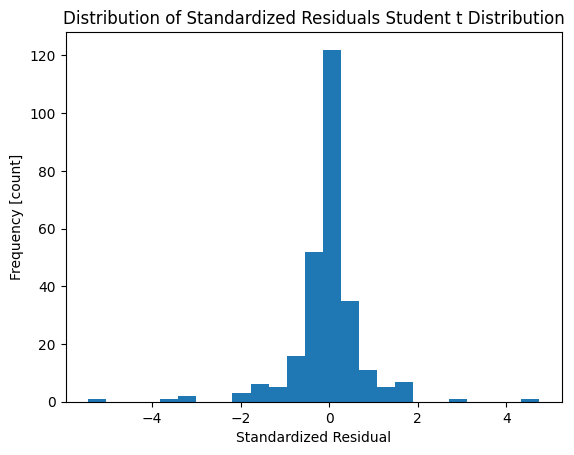

In [ ]:


plt.hist(model_t.std_resid, bins=25)

# Add axis labels
plt.xlabel("Standardized Residual")
plt.ylabel("Frequency [count]")



# Add title
plt.title("Distribution of Standardized Residuals Student t Distribution")

Text(0, 0.5, 'Correlation Coefficient')

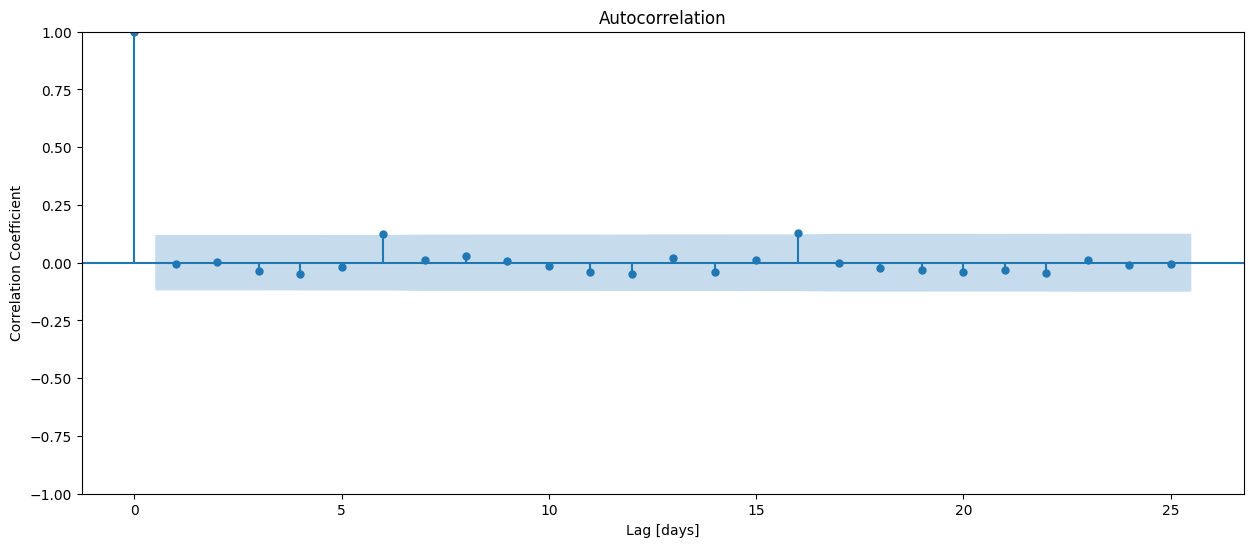

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared, standardized residuals
plot_acf(model.std_resid**2, ax=ax)

# Add axis labels
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient")

Text(0, 0.5, 'Correlation Coefficient')

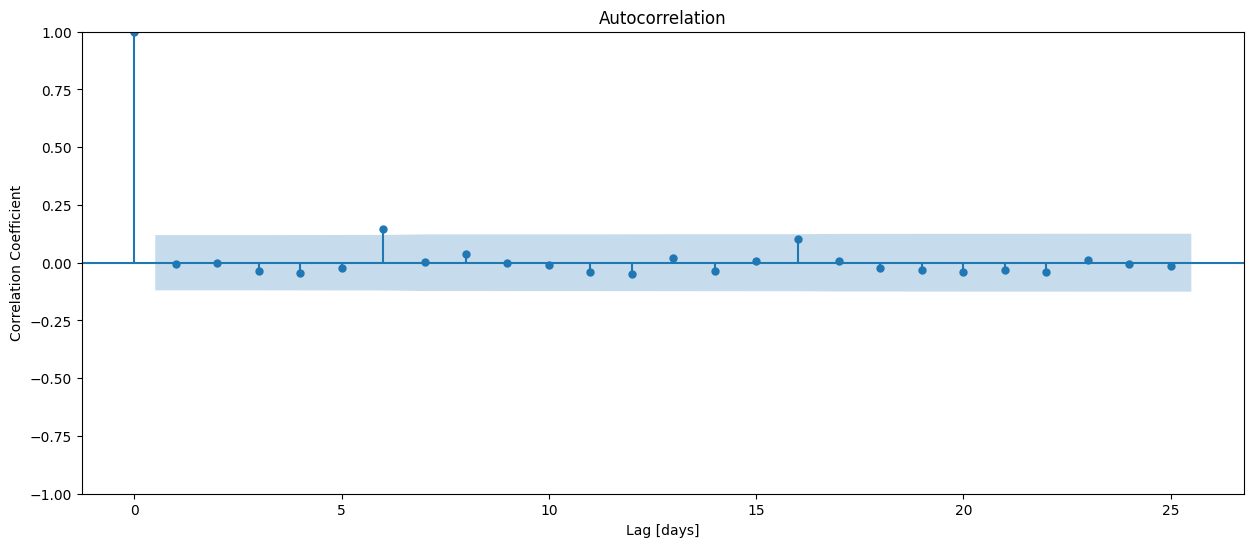

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared, standardized residuals
plot_acf(model_t.std_resid**2, ax=ax)

# Add axis labels
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient")

In [ ]:
one_hour_forecast = model.forecast(horizon=1,reindex=False).variance
print("one_hour_forecast type:", type(one_hour_forecast))
one_hour_forecast

one_hour_forecast type: <class 'pandas.core.frame.DataFrame'>


,h.1
date,
2025-08-01 07:00:00,0.148869


In [ ]:
# Create empty list to hold predictions
predictions = []

# Calculate size of test data (20%)
test_size = int(len(y) * 0.2)

# Walk forward
for i in range(test_size):
    # Create test data
    y_train = y.iloc[: -(test_size - i)]

    # Train model
    model = arch_model(y_train,p=1,q=0, rescale= False).fit(disp=0)

    # Generate next prediction (volatility, not variance)
    next_pred = model.forecast(horizon=1, reindex=False).variance.iloc[0,0] **0.5
    # Append prediction to list
    predictions.append(next_pred)

# Create Series from predictions list
y_test_wfv_n = pd.Series(predictions, index=y.tail(test_size).index)

print("y_test_wfv_n type:", type(y_test_wfv_n))
print("y_test_wfv_n shape:", y_test_wfv_n.shape)
y_test_wfv_n.head()


y_test_wfv_n type: <class 'pandas.core.series.Series'>
y_test_wfv_n shape: (67,)


,0
date,
2025-08-01 06:00:00,0.385835
2025-08-01 05:00:00,0.409024
2025-08-01 04:00:00,0.558045
2025-07-31 19:00:00,0.542597
2025-07-31 18:00:00,0.925393


In [ ]:
# Create empty list to hold predictions
predictions = []

# Calculate size of test data (20%)
test_size = int(len(y) * 0.2)

# Walk forward
for i in range(test_size):
    # Create test data
    y_train = y.iloc[: -(test_size - i)]

    # Train model
    model_t = arch_model(y_train, mean='Constant', vol='ARCH', p=1,q=1, dist='t').fit(disp=0)

    # Generate next prediction (volatility, not variance)
    next_pred = model_t.forecast(horizon=1, reindex=False).variance.iloc[0,0] **0.5

    # Append prediction to list
    predictions.append(next_pred)

# Create Series from predictions list
y_test_wfv_t = pd.Series(predictions, index=y.tail(test_size).index)

print("y_test_wfv_t type:", type(y_test_wfv_t))
print("y_test_wfv_t shape:", y_test_wfv_t.shape)
y_test_wfv_t.head()


y_test_wfv_t type: <class 'pandas.core.series.Series'>
y_test_wfv_t shape: (67,)


,0
date,
2025-08-01 06:00:00,0.475196
2025-08-01 05:00:00,0.516257
2025-08-01 04:00:00,0.639522
2025-07-31 19:00:00,0.663230
2025-07-31 18:00:00,1.013161


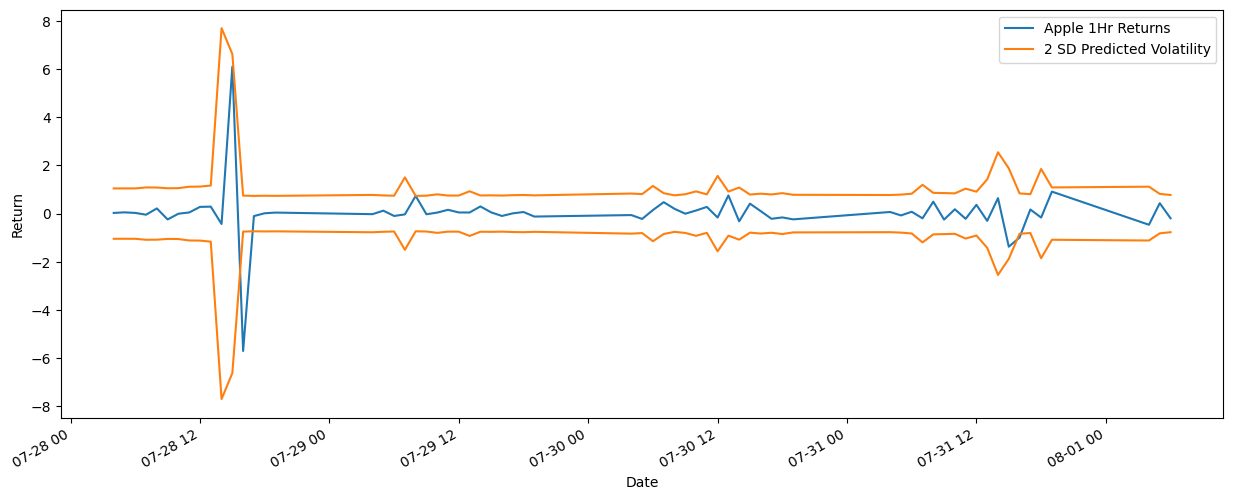

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot returns for test data
y.tail(test_size).plot(ax=ax, label="Apple 1Hr Returns")

# Plot volatility predictions * 2
(2 * y_test_wfv_n).plot(ax=ax, c="C1", label="2 SD Predicted Volatility")

# Plot volatility predictions * -2
(-2 * y_test_wfv_n).plot(ax=ax, c="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")

# Add legend
plt.legend();

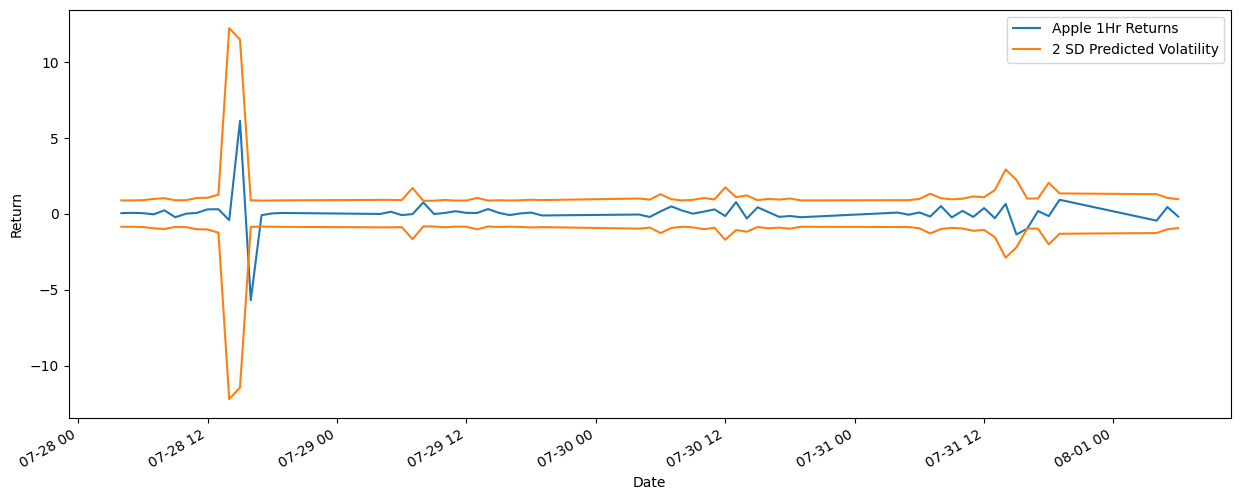

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot returns for test data
y.tail(test_size).plot(ax=ax, label="Apple 1Hr Returns")

# Plot volatility predictions * 2
(2 * y_test_wfv_t).plot(ax=ax, c="C1", label="2 SD Predicted Volatility")

# Plot volatility predictions * -2
(-2 * y_test_wfv_t).plot(ax=ax, c="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")

# Add legend
plt.legend();

In [ ]:
df_predict_n = pd.concat([y_test_wfv_n,y_test], axis=1)
df_predict_n.columns = ["Prediction","Actual"]
df_predict_n.head()

,Prediction,Actual
date,,
2025-08-01 06:00:00,0.385835,-0.194151
2025-08-01 05:00:00,0.409024,0.431763
2025-08-01 04:00:00,0.558045,-0.462969
2025-07-31 19:00:00,0.542597,0.911332
2025-07-31 18:00:00,0.925393,-0.164628


<Axes: xlabel='date'>

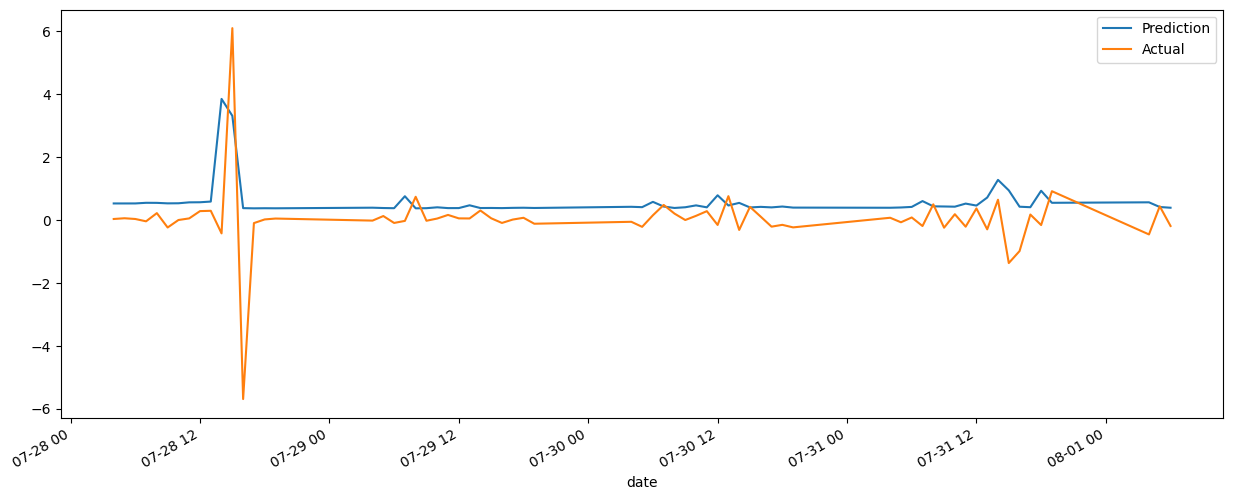

In [ ]:
df_predict_n.plot(figsize=(15,6))

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
df_predict_t = pd.concat([y_test_wfv_n,y_test], axis=1)
df_predict_t.columns = ["Prediction","Actual"]
df_predict_t.head()

,Prediction,Actual
date,,
2025-08-01 06:00:00,0.385835,-0.194151
2025-08-01 05:00:00,0.409024,0.431763
2025-08-01 04:00:00,0.558045,-0.462969
2025-07-31 19:00:00,0.542597,0.911332
2025-07-31 18:00:00,0.925393,-0.164628


<Axes: xlabel='date'>

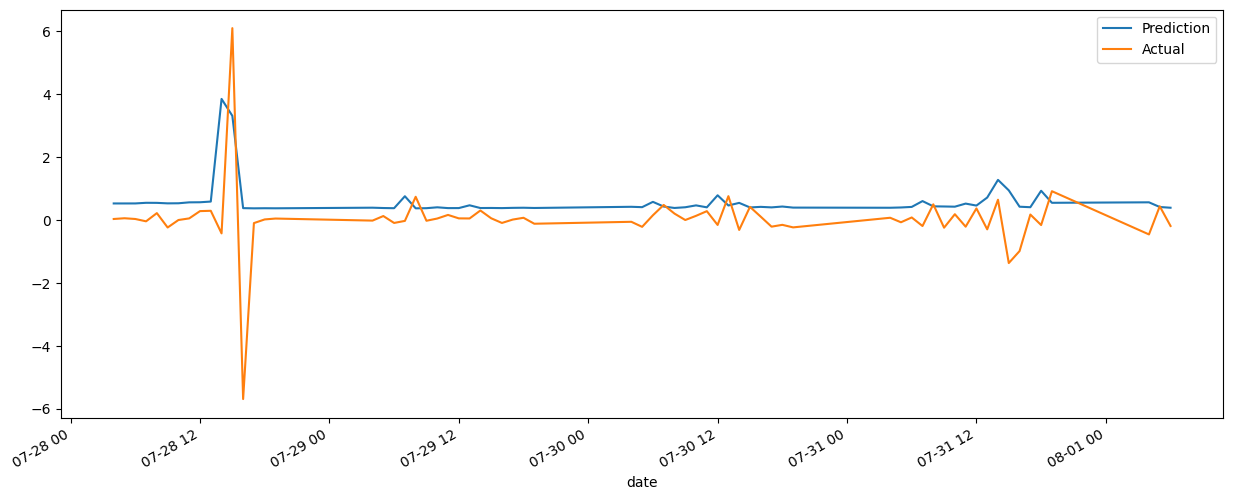

In [ ]:
df_predict_t.plot(figsize=(15,6))

In [ ]:
y_test_mean = y_test.mean()
y_test_mean

np.float64(0.029127514580888303)

In [ ]:
y_test_mean_cal = [y_test_mean] * len(y_test)


In [ ]:
mae = mean_absolute_error(y_test,y_test_mean_cal)
print(f"the model mean absolute error is {mae}")

the model mean absolute error is 0.4013841149774663


In [ ]:
df_predict_n["Error"] = df_predict_n["Actual"] - df_predict_n["Prediction"]
df_predict_n.head()

,Prediction,Actual,Error
date,,,
2025-08-01 06:00:00,0.385835,-0.194151,-0.579986
2025-08-01 05:00:00,0.409024,0.431763,0.022739
2025-08-01 04:00:00,0.558045,-0.462969,-1.021014
2025-07-31 19:00:00,0.542597,0.911332,0.368735
2025-07-31 18:00:00,0.925393,-0.164628,-1.090021


In [ ]:
model_mae = mean_absolute_error(df_predict_t["Actual"],df_predict_t["Prediction"])
print(f"the model mean absolute error is {model_mae}")

the model mean absolute error is 0.6625861336769617


In [ ]:
df_mean = pd.DataFrame(y_test_mean_cal, index=y_test_wfv_t.index)
df_mean.columns = ["Mean"]
df_mean.head()

,Mean
date,
2025-08-01 06:00:00,0.029128
2025-08-01 05:00:00,0.029128
2025-08-01 04:00:00,0.029128
2025-07-31 19:00:00,0.029128
2025-07-31 18:00:00,0.029128


In [ ]:
df_mean.head()

,Mean
date,
2025-08-01 06:00:00,0.029128
2025-08-01 05:00:00,0.029128
2025-08-01 04:00:00,0.029128
2025-07-31 19:00:00,0.029128
2025-07-31 18:00:00,0.029128


In [ ]:
df_predict_t.head()

,Prediction,Actual
date,,
2025-08-01 06:00:00,0.385835,-0.194151
2025-08-01 05:00:00,0.409024,0.431763
2025-08-01 04:00:00,0.558045,-0.462969
2025-07-31 19:00:00,0.542597,0.911332
2025-07-31 18:00:00,0.925393,-0.164628


In [ ]:
df_mean_w = pd.concat([df_mean,y_test], axis=1)
df_mean_w.head()

,Mean,return
date,,
2025-08-01 06:00:00,0.029128,-0.194151
2025-08-01 05:00:00,0.029128,0.431763
2025-08-01 04:00:00,0.029128,-0.462969
2025-07-31 19:00:00,0.029128,0.911332
2025-07-31 18:00:00,0.029128,-0.164628


<Axes: xlabel='date'>

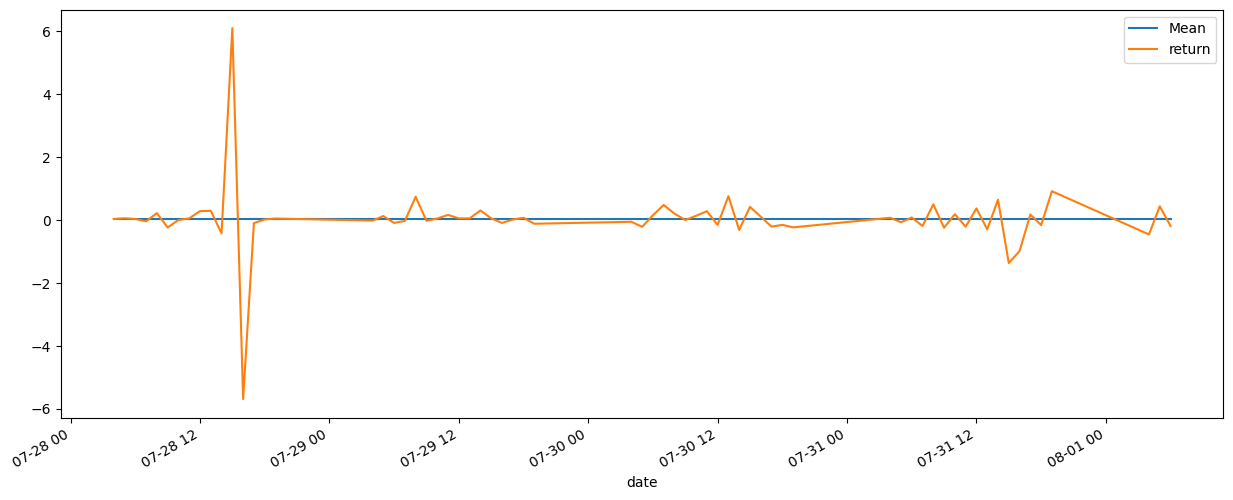

In [ ]:
df_mean_w.plot(figsize=(15,6))